### Charlie Buhanan
### Data Science Project 2: Part 2
### Web Scraped Data Analysis & Visualizations
### 3/26/2024


### Setup

In [2]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import os
import csv

In [3]:
url='https://5e.d20srd.org/indexes/monsters.htm'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [4]:
#print(soup.prettify())
type(soup)
#print(response.text)

bs4.BeautifulSoup

In [8]:
# Set Up Code Block
soup = bs(response.content, 'html.parser')

# Find all <a> tags with href attribute
links = soup.find_all('a', href=True)

# Extract and print the href attributes
count = 0
monsterLinks = []
for link in links:
    if "monsters" in str(link) and "#" not in str(link):
        href = link['href']
        count += 1
        monsterLinks.append(href)
        if href == "/srd/monsters/zombie.htm": #breaks when reaching final monster instead of repeating, does not include later links
            break
            
monsterLinks.remove("/srd/monsters/halfDragon.htm") # Removes half dragon, this is an incompatible template
monsterLinks.remove("/srd/monsters/spectre.htm") # Removes spectre, this link is broken
monsterLinks.remove("/srd/monsters/spiderEater.htm") # Removes spider eater, this link is broken
print(count) # Total number of monsters
#print(monsterLinks)

108


### Web Scraping

In [49]:
#What is the average Challenge of a monster?
#What is the most common monster type? (I also included size)
#What percentage of monsters have the Spellcasting trait?
#What percent of monsters have a swim or climb speed? (I also included fly)


# Function to get all HTMl code for each link
def fetch_html(link):
    url = f'https://5e.d20srd.org{link}'
    response = requests.get(url)
    return str(response.text)

# Finds string in this format: Size type, alignment
def get_size_type(html_text, size_text):
    size_index = str_html_source.find(size_text)
    if size_index == -1:
        return ["NA", "NA"]
    else: 
        x = size_index+4
        size_type_string = ""
        while html_text[x] != "<":
            size_type_string += html_text[x]
            x += 1
        words = size_type_string.split(" ")
        if words[1][-1] == ",": # removes comma at the end of each type
            words[1] = words[1][0:-1]
        if words[0] == "edium":
            words[0] = "Medium"
        if words[0] == "mall":
            words[0] = "Small"
        return[words[0], words[1]]
    

# Saving to csv file - TESTING
with open('MonsterData.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Monster Link', 'Challenge Rating','Size','Monster Type','Spellcaster','Swim','Climb','Fly'])
    for link in monsterLinks:
        html_source = fetch_html(link)
        str_html_source = str(html_source)
        str_html_source = str_html_source[0:str_html_source.find("<h3>Actions</h3>")] #filters data
        #print(link) # TEST 0
        
        # Challenge Rating
        challenge_index = str_html_source.find("<strong>Challenge")
        challenge_str = str_html_source[challenge_index+27: challenge_index+30]
        # Look for challenge number
        if challenge_str[0].isnumeric():
            if challenge_str[1].isnumeric(): # whole numbers, 2 digit
                challenge_str = challenge_str[0:2]
                challenge = float(challenge_str)
            elif challenge_str[1] == "/": # fractional challenges
                challenge_str = challenge_str[0:3]
                challenge = float(challenge_str[0]) / float(challenge_str[2])
            else:
                challenge_str = challenge_str[0] # whole numbers, 1 digit
                challenge = float(challenge_str)
        else: # challenge number not found (likely in heading)
            challenge_str = str_html_source[challenge_index + 18:challenge_index + 19]
            challenge = float(challenge_str)
        print("Challenge (str):",challenge_str) #TESTING
        print("Challenge (float):",challenge) #TESTING
        
        # Monster Type & Size
        sizes = ["<em>Tiny","<em>Small","<p>Small","<p>Medium","<em>Medium","<em>Large","<em>Huge","<em>Gargantuan"]
        for s in sizes:
            size, type = get_size_type(str_html_source, s)
            if size != "NA":
                break
        #print("Size:",size) #TESTING
        #print("Type:",type) #TESTING
            
            
        #Spellcasting
        #sets spellcasting to true based on whether monster contains one of these attributes
        if "<em>Spellcasting.</em>" in str_html_source or "<strong>Spellcasting.</strong>" in str_html_source or "<strong>Innate Spellcasting.</strong>" in str_html_source:
            spellcasting = True
        else:
            spellcasting = False
        print("Spellcasting:",spellcasting)  #TESTING
        #str_html_source = str_html_source[0:challenge_index] <- filters data, I don't think this is actually more efficient
        
        # Swim & Climb
        speed_index = str_html_source.find("<strong>Speed")
        speed_string = str_html_source[speed_index + 13: speed_index + 50]
        swim = "swim" in speed_string
        climb = "climb" in speed_string
        fly = "fly" in speed_string
        
        print("Swim:",swim)#TESTING
        print("Climb:",climb)#TESTING
        print("Fly:",fly)#TESTING
        
        print("END\n")#TESTING
        
        csvwriter.writerow([link, challenge, size, type, spellcasting, swim, climb, fly])# FINAL PART
        
    print("Done")
    print("Data saved to MonsterData.csv")

/srd/monsters/aboleth.htm
Challenge (str): 10
Challenge (float): 10.0
Size: Large
Type: aberration
Spellcasting: False
Swim: True
Climb: False
Fly: False
END

/srd/monsters/angels.htm
Challenge (str): 10
Challenge (float): 10.0
Size: Medium
Type: celestial
Spellcasting: True
Swim: False
Climb: False
Fly: True
END

/srd/monsters/animatedObjects.htm
Challenge (str): 1
Challenge (float): 1.0
Size: Medium
Type: construct
Spellcasting: False
Swim: False
Climb: False
Fly: False
END

/srd/monsters/ankheg.htm
Challenge (str): 2
Challenge (float): 2.0
Size: Large
Type: monstrosity
Spellcasting: False
Swim: False
Climb: False
Fly: False
END

/srd/monsters/azer.htm
Challenge (str): 2
Challenge (float): 2.0
Size: Medium
Type: elemental
Spellcasting: False
Swim: False
Climb: False
Fly: False
END

/srd/monsters/basilisk.htm
Challenge (str): 3
Challenge (float): 3.0
Size: Medium
Type: monstrosity
Spellcasting: False
Swim: False
Climb: False
Fly: False
END

/srd/monsters/behir.htm
Challenge (str): 11


/srd/monsters/invisibleStalker.htm
Challenge (str): 6
Challenge (float): 6.0
Size: Medium
Type: elemental
Spellcasting: False
Swim: False
Climb: False
Fly: True
END

/srd/monsters/kobold.htm
Challenge (str): 1/8
Challenge (float): 0.125
Size: Small
Type: humanoid
Spellcasting: False
Swim: False
Climb: False
Fly: False
END

/srd/monsters/kraken.htm
Challenge (str): 23
Challenge (float): 23.0
Size: Gargantuan
Type: monstrosity
Spellcasting: False
Swim: True
Climb: False
Fly: False
END

/srd/monsters/lamia.htm
Challenge (str): 4
Challenge (float): 4.0
Size: Large
Type: monstrosity
Spellcasting: False
Swim: False
Climb: False
Fly: False
END

/srd/monsters/lich.htm
Challenge (str): 21
Challenge (float): 21.0
Size: Medium
Type: undead
Spellcasting: True
Swim: False
Climb: False
Fly: False
END

/srd/monsters/lizardfolk.htm
Challenge (str): 1/2
Challenge (float): 0.5
Size: Medium
Type: humanoid
Spellcasting: False
Swim: True
Climb: False
Fly: False
END

/srd/monsters/lycanthrope.htm
Challenge 

In [10]:
#Checking file - it worked!
#with open("MonsterData.csv") as f:
    #reader = csv.reader(f)
    #for row in reader:
        #print(" \t ".join(row)) #TESTING


## Creating Pandas DF And Plots

In [11]:
# Creating Pandas DF from csv file
import pandas as pd

df = pd.read_csv('MonsterData.csv')
print(df) 

# Data Cleaning
#print(df.isna().sum()) # 4 NA values (in size and type)
#/srd/monsters/gnomeDeep.htm 	 0.5 	 NA 	 NA 	 True 	 False 	 False 	 False
#/srd/monsters/grick.htm 	 2.0 	 NA 	 NA 	 False 	 False 	 True 	 False
# Small formatting error in the website, I went back and added "<p>Small","<p>Medium" to the size_type code

                          Monster Link  Challenge Rating    Size Monster Type  \
0            /srd/monsters/aboleth.htm             10.00   Large   aberration   
1             /srd/monsters/angels.htm             10.00  Medium    celestial   
2    /srd/monsters/animatedObjects.htm              1.00  Medium    construct   
3             /srd/monsters/ankheg.htm              2.00   Large  monstrosity   
4               /srd/monsters/azer.htm              2.00  Medium    elemental   
..                                 ...               ...     ...          ...   
100        /srd/monsters/willOWisp.htm              2.00    Tiny       undead   
101           /srd/monsters/wraith.htm              5.00  Medium       undead   
102           /srd/monsters/wyvern.htm              6.00   Large       dragon   
103             /srd/monsters/xorn.htm              5.00  Medium    elemental   
104           /srd/monsters/zombie.htm              0.25  Medium       undead   

     Spellcaster   Swim  Cl

In [52]:
print(df.isna().sum()) #Now sum is 0

Monster Link        0
Challenge Rating    0
Size                0
Monster Type        0
Spellcaster         0
Swim                0
Climb               0
Fly                 0
dtype: int64


In [53]:
print(df.columns)
print()
print(df.info())

Index(['Monster Link', 'Challenge Rating', 'Size', 'Monster Type',
       'Spellcaster', 'Swim', 'Climb', 'Fly'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Monster Link      105 non-null    object 
 1   Challenge Rating  105 non-null    float64
 2   Size              105 non-null    object 
 3   Monster Type      105 non-null    object 
 4   Spellcaster       105 non-null    bool   
 5   Swim              105 non-null    bool   
 6   Climb             105 non-null    bool   
 7   Fly               105 non-null    bool   
dtypes: bool(4), float64(1), object(3)
memory usage: 3.8+ KB
None


### Data Analysis
#### Question 1: What is the average Challenge of a monster?

In [54]:
df['Challenge Rating'].mean() #Average Challenge is around 5

5.1154761904761905

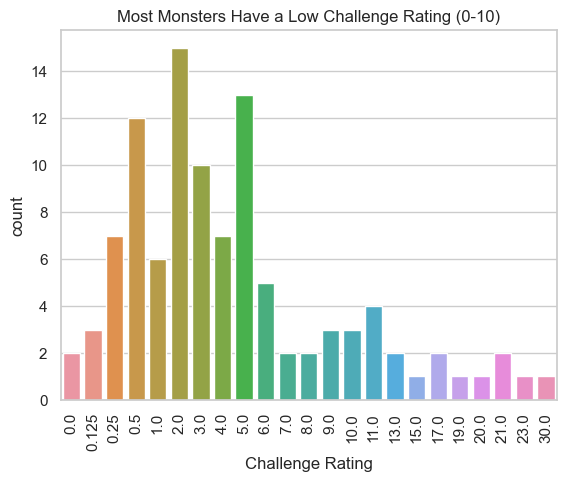

In [118]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.title('Most Monsters Have a Low Challenge Rating (0-10)')
sns.countplot(x='Challenge Rating', data=df)
plt.xticks(rotation=90)  # Rotate x axis labels
plt.show()
# As you can see, the average is around 5.

### Data Analysis
#### Question 2: What is the most common monster type?

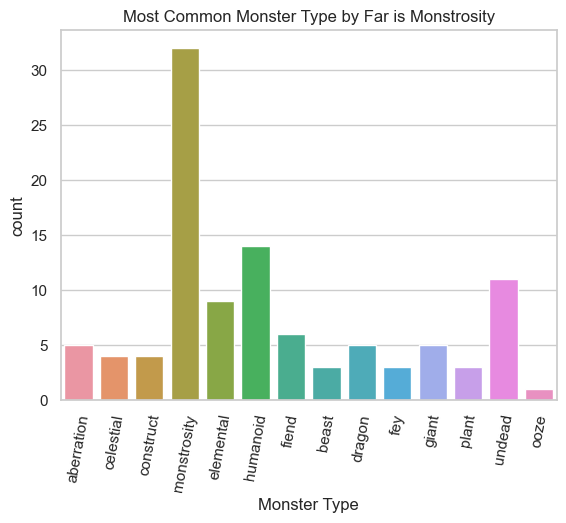

In [119]:
sns.countplot(x='Monster Type', data=df)
plt.xticks(rotation=80)
plt.title('Most Common Monster Type by Far is Monstrosity')
plt.show()

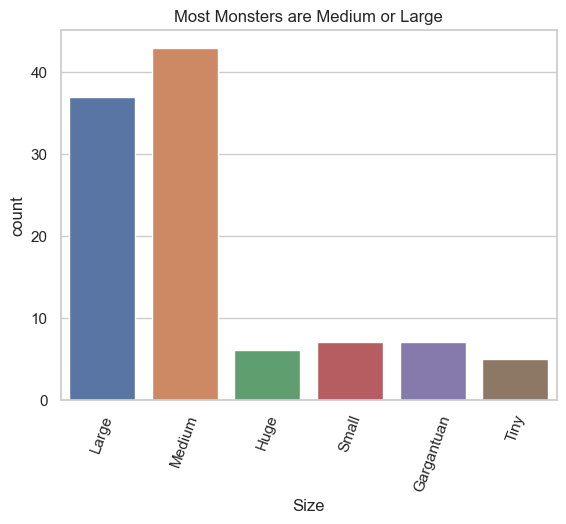

In [120]:
sns.countplot(x='Size', data=df)
plt.xticks(rotation=70)
plt.title('Most Monsters are Medium or Large')
plt.show()

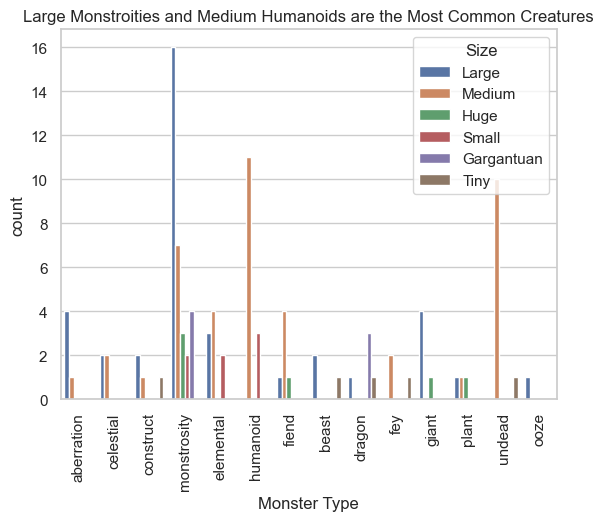

monstrosity
Medium


In [121]:
sns.countplot(x='Monster Type', hue = "Size", data=df)
plt.xticks(rotation=90)
plt.title('Large Monstroities and Medium Humanoids are the Most Common Creatures')
plt.show()

#Finds most common monster type and size
maxtype = df['Monster Type'].value_counts().idxmax()
print(maxtype)
maxsize = df['Size'].value_counts().idxmax()
print(maxsize)

#The most common monster type is Monstrosity.
#The most common monster size is Medium.
#The most monster & size combination is Large Monstrosity, according the the graph.

### Data Analysis
#### Question 3: What percentage of monsters have the Spellcasting trait?

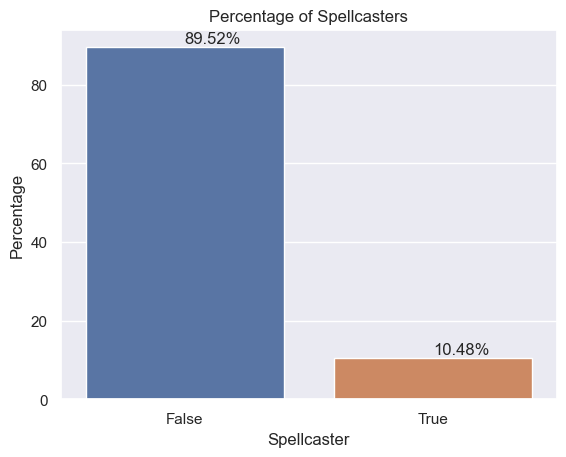

Spellcaster
False    89.52381
True     10.47619
Name: proportion, dtype: float64

Spellcaster
False    94
True     11
Name: count, dtype: int64


In [122]:
sns.set(style="darkgrid")
total = len(df)
percentages = df['Spellcaster'].value_counts(normalize=True) * 100

#Plotting Percentages of spellcasters
sns.barplot(x=percentages.index, y=percentages.values)
for i, v in enumerate(percentages.values):
    plt.text(i, v + 1, f"{v:.2f}%")
plt.ylabel('Percentage')
plt.title('Percentage of Spellcasters')
plt.show()

#Numerically
print(df['Spellcaster'].value_counts(normalize=True) * 100)
print()
print(df['Spellcaster'].value_counts())
#About 10.48% of monsters are spellcasters.

### Data Analysis
#### Question 4: What percent of monsters have a swim or climb speed? (And fly speed)

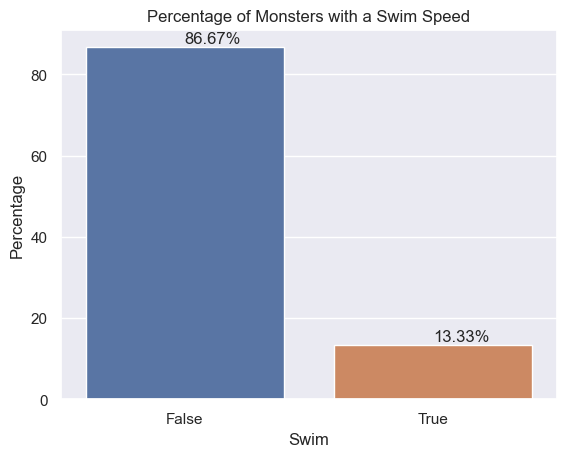

Swim
False    86.666667
True     13.333333
Name: proportion, dtype: float64

Swim
False    91
True     14
Name: count, dtype: int64


In [123]:
percentages = df['Swim'].value_counts(normalize=True) * 100

sns.barplot(x=percentages.index, y=percentages.values)
for i, v in enumerate(percentages.values):
    plt.text(i, v + 1, f"{v:.2f}%")
plt.ylabel('Percentage')
plt.title('Percentage of Monsters with a Swim Speed')
plt.show()

#Numerically
print(df['Swim'].value_counts(normalize=True) * 100)
print()
print(df['Swim'].value_counts())
#About 13.33% of monsters can swim.

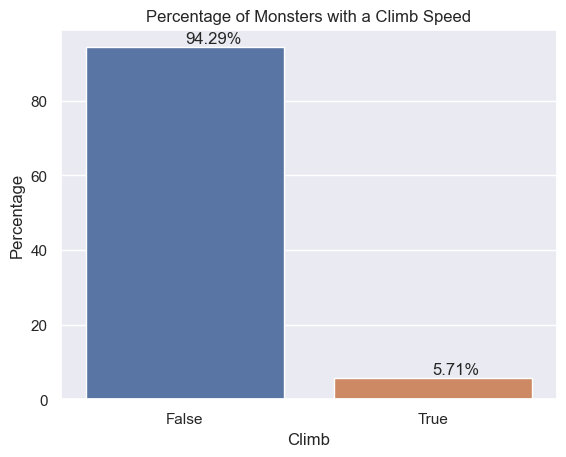

Climb
False    94.285714
True      5.714286
Name: proportion, dtype: float64

Climb
False    99
True      6
Name: count, dtype: int64


In [124]:
percentages = df['Climb'].value_counts(normalize=True) * 100

sns.barplot(x=percentages.index, y=percentages.values)
for i, v in enumerate(percentages.values):
    plt.text(i, v + 1, f"{v:.2f}%")
plt.ylabel('Percentage')
plt.title('Percentage of Monsters with a Climb Speed')
plt.show()

#Numerically
print(df['Climb'].value_counts(normalize=True) * 100)
print()
print(df['Climb'].value_counts())
#About 5.71% of monsters can climb.

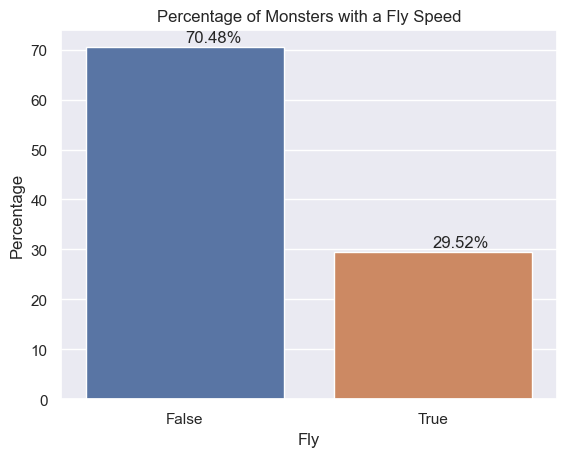

Fly
False    70.47619
True     29.52381
Name: proportion, dtype: float64

Fly
False    74
True     31
Name: count, dtype: int64


In [125]:
percentages = df['Fly'].value_counts(normalize=True) * 100

sns.barplot(x=percentages.index, y=percentages.values)
for i, v in enumerate(percentages.values):
    plt.text(i, v + 1, f"{v:.2f}%")
plt.ylabel('Percentage')
plt.title('Percentage of Monsters with a Fly Speed')
plt.show()

#Numerically
print(df['Fly'].value_counts(normalize=True) * 100)
print()
print(df['Fly'].value_counts())
#About 29.52% of monsters can fly.

Text(0.5, 1.0, 'Correlation Between Fly, Swim, Climb, and Spellcasting is Negligible')

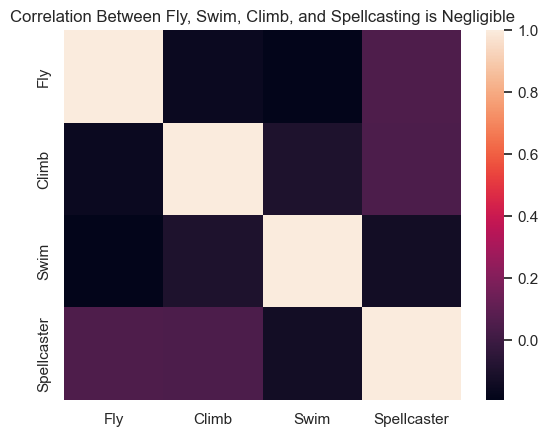

In [126]:
sns.heatmap(df[['Fly', 'Climb','Swim' ,'Spellcaster']].corr())  
plt.title('Correlation Between Fly, Swim, Climb, and Spellcasting is Negligible')
#Spellcaster, Swim, Climb, and Fly do not really correlate with each other.